In [7]:
from stockai.llm import LLM

llm = LLM('embedding')

llm.get_embeddings().embed_query("你好")



[-0.007786486,
 0.0030635218,
 0.048999373,
 -0.01888824,
 -0.035900466,
 0.015862327,
 -0.01067077,
 0.0041407053,
 -0.00090730225,
 0.021380873,
 0.07677743,
 0.016190486,
 0.02762464,
 -0.014990083,
 -0.043697175,
 -0.00022716483,
 -0.0028992645,
 -0.040561415,
 -0.021718135,
 -0.03863862,
 -0.008903424,
 -0.023674773,
 -0.054912,
 -0.034821577,
 0.025135666,
 0.03655958,
 0.028641539,
 0.00016932108,
 0.025531072,
 0.04018289,
 -0.022235371,
 -0.04130813,
 0.030629976,
 -0.016588442,
 -0.028407967,
 -0.0050124764,
 0.018585792,
 -0.020895297,
 -0.035891443,
 -0.060278647,
 0.04564358,
 -0.022089215,
 0.082795314,
 -0.00743427,
 0.035391152,
 -0.018704215,
 -0.049329944,
 -0.01379917,
 0.030861447,
 -0.032388702,
 -0.0067101168,
 -0.048089013,
 0.064865164,
 0.02483853,
 0.014289522,
 -0.0107837645,
 0.007322614,
 -0.026721241,
 0.0043201107,
 0.067896225,
 0.02485328,
 -0.0123031065,
 0.023151526,
 -0.012036504,
 0.05569106,
 0.019995807,
 0.01446923,
 0.023831705,
 0.025877452,
 -

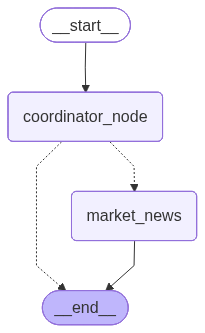

In [2]:
from langchain_core.messages import HumanMessage
from stockai.agent import graph
from IPython.display import Image, display


display(Image(graph.get_graph(xray = True).draw_mermaid_png()))

# for chunk in graph.stream({'user_input': HumanMessage(content = '今天的大盘如何')}, stream_mode = 'updates'):
#     if 'tools' in chunk.keys():
#         chunk['tools']['messages'][0].pretty_print()
#     elif 'agent' in chunk.keys():
#         chunk['agent']['messages'][0].pretty_print()
#     else:
#         print(chunk)

In [1]:
from stockai.subagents.market import get_proper_concept

result = get_proper_concept({'user_input' : '今天涨幅前3的板块是哪些'})

INFO:stockai.llm:使用 DeepSeek Chat 模型: deepseek-chat
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:stockai.tools.akshare.client:调用AKShare API: stock_board_concept_name_em params={'args': (), 'kwargs': {}}


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:stockai.tools.akshare.client:API调用成功: stock_board_concept_name_em, 耗时: 1459.5ms
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.deepseek.com/v1/chat/completions "HTTP/1.1 200 OK"


In [3]:
for m in result['messages']:
    m.pretty_print()

================================ Human Message =================================

今天涨幅前3的板块是哪些
================================== Ai Message ==================================

我来为您查询今天涨幅前3的板块。
Tool Calls:
  get_concept_realtime_data (call_00_z9C5UHNZ7M5aEcts2THlGUEV)
 Call ID: call_00_z9C5UHNZ7M5aEcts2THlGUEV
  Args:
    top_n: 3
    format: dict
================================= Tool Message =================================
Name: get_concept_realtime_data

[{"板块名称": "赛马概念", "板块代码": "BK0709", "最新价": 835.3, "涨跌额": 39.54, "涨跌幅": 4.97, "换手率": 6.7, "上涨家数": 3, "下跌家数": 0}, {"板块名称": "快手概念", "板块代码": "BK0972", "最新价": 1681.64, "涨跌额": 40.94, "涨跌幅": 2.5, "换手率": 9.27, "上涨家数": 22, "下跌家数": 6}, {"板块名称": "影视概念", "板块代码": "BK0847", "最新价": 1079.23, "涨跌额": 23.68, "涨跌幅": 2.24, "换手率": 5.72, "上涨家数": 55, "下跌家数": 8}]
================================== Ai Message ==================================

根据实时数据，今天涨幅前3的板块是：

1. **赛马概念 (BK0709)** - 涨幅：4.97%
   - 最新价：835.3
   - 上涨家数：3家，下跌家数：0家
   - 换手率：6.7%

2. **快手概念 

In [3]:
from stockai.tools.akshare import get_limitup_stocks_by_date
import pandas as pd

def _format_time(time_str):
    """
    将形如 '093001' 的时间字符串格式化为 '09:30:01'，空值返回 '未知'。
    """
    if pd.isna(time_str) or time_str == '':
        return '未知'
    # time_str = str(time_str)
    if len(time_str) >= 6:
        return f"{time_str[:2]}:{time_str[2:4]}:{time_str[4:6]}"
    return str(time_str)


df = get_limitup_stocks_by_date('20250910', format = None)
df

INFO:stockai.tools.akshare.client:调用AKShare API: stock_zt_pool_em params={'args': (), 'kwargs': {'date': '20250910'}}
INFO:stockai.tools.akshare.client:API调用成功: stock_zt_pool_em, 耗时: 771.5ms


,序号,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,1,603359,东珠生态,10.023867,9.22,16206188,4.113005e+09,4.113005e+09,0.394023,277736632,09:25:00,09:25:00,0,1/1,1,环保行业
1,2,601116,三江购物,9.985097,14.76,692377472,8.083733e+09,8.083733e+09,8.629417,131374878,09:25:01,10:04:10,3,2/2,2,商业百货
2,3,605255,天普股份,10.001447,76.00,43149304,1.019008e+10,1.019008e+10,0.423444,682635496,09:25:02,09:25:02,0,26/13,2,汽车零部
3,4,605398,新炬网络,10.000000,32.56,117121804,5.298045e+09,5.298045e+09,2.210661,121057852,09:25:03,09:25:03,0,1/1,1,互联网服
4,5,002264,新 华 都,10.054348,8.10,743642032,5.303741e+09,5.830471e+09,14.137341,62829456,09:30:30,10:01:03,4,1/1,1,互联网服
5,6,600103,青山纸业,9.872612,3.45,1384877312,7.632535e+09,7.730852e+09,18.301081,133931511,09:30:57,10:25:15,3,7/4,2,造纸印刷
6,7,002905,金逸影视,9.990301,11.34,205439477,3.962650e+09,4.267469e+09,5.315578,90782721,09:32:39,09:32:39,0,1/1,1,文化传媒
7,8,600545,卓郎智能,10.108303,3.05,229343239,5.453132e+09,5.453132e+09,4.273706,105347555,09:33:12,09:33:12,0,1/1,1,专用设备
8,9,600376,首开股份,10.117647,4.68,909178752,1.207237e+10,1.207237e+10,7.704568,114705241,09:33:15,09:39:39,4,6/6,6,房地产开
9,10,600173,卧龙新能,9.960681,8.39,1156931216,5.876492e+09,5.877247e+09,20.308226,36886635,09:34:19,14:20:34,3,3/3,3,房地产开


In [13]:
df['首次封板时间'].apply(_format_time)

TypeError: string indices must be integers, not 'str'

In [18]:
import akshare as ak

df = ak.stock_zt_pool_em('20250910')
# df['首次封板时间'] = _format_time(df['首次封板时间'])
df['最后封板时间'] = df['最后封板时间'].apply(_format_time)
df

,序号,代码,名称,涨跌幅,最新价,成交额,流通市值,总市值,换手率,封板资金,首次封板时间,最后封板时间,炸板次数,涨停统计,连板数,所属行业
0,1,603359,东珠生态,10.023867,9.22,16206188,4.113005e+09,4.113005e+09,0.394023,277736632,092500,09:25:00,0,1/1,1,环保行业
1,2,601116,三江购物,9.985097,14.76,692377472,8.083733e+09,8.083733e+09,8.629417,131374878,092501,10:04:10,3,2/2,2,商业百货
2,3,605255,天普股份,10.001447,76.00,43149304,1.019008e+10,1.019008e+10,0.423444,682635496,092502,09:25:02,0,26/13,2,汽车零部
3,4,605398,新炬网络,10.000000,32.56,117121804,5.298045e+09,5.298045e+09,2.210661,121057852,092503,09:25:03,0,1/1,1,互联网服
4,5,002264,新 华 都,10.054348,8.10,743642032,5.303741e+09,5.830471e+09,14.137341,62829456,093030,10:01:03,4,1/1,1,互联网服
5,6,600103,青山纸业,9.872612,3.45,1384877312,7.632535e+09,7.730852e+09,18.301081,133931511,093057,10:25:15,3,7/4,2,造纸印刷
6,7,002905,金逸影视,9.990301,11.34,205439477,3.962650e+09,4.267469e+09,5.315578,90782721,093239,09:32:39,0,1/1,1,文化传媒
7,8,600545,卓郎智能,10.108303,3.05,229343239,5.453132e+09,5.453132e+09,4.273706,105347555,093312,09:33:12,0,1/1,1,专用设备
8,9,600376,首开股份,10.117647,4.68,909178752,1.207237e+10,1.207237e+10,7.704568,114705241,093315,09:39:39,4,6/6,6,房地产开
9,10,600173,卧龙新能,9.960681,8.39,1156931216,5.876492e+09,5.877247e+09,20.308226,36886635,093419,14:20:34,3,3/3,3,房地产开
